## Imports

In [1]:
import os
import sys
import librosa
from librosa import display
from IPython.display import Audio
import matplotlib.pyplot as plt

print(os.getcwd())
sys.path.append(os.getcwd().replace('notebooks', 'scripts'))

import notebook_utils as nou

/Users/Lukas/Documents/J.A.R.V.I.S./bed/notebooks


## 1. Basic Visualizing

In [2]:
desk_path = '../data/desk.wav'
worm_path = '../data/worms.wav'

Audio(desk_path)

In [3]:
desk_samples, desk_sr = librosa.load(desk_path, sr=None, mono=True, offset=0.0, duration=None)
worms_samples, worms_sr = librosa.load(worm_path, sr=None, mono=True, offset=0.0, duration=None)

print(f"{desk_path}: {len(desk_samples)/desk_sr:.2f}s with sampling rate of {desk_sr / 1e3}kHz.")
print(f"{worm_path}: {len(worms_samples)/worms_sr:.2f}s with sampling rate of {worms_sr / 1e3}kHz.")

../data/desk.wav: 5.40s with sampling rate of 44.1kHz.
../data/worms.wav: 5.53s with sampling rate of 44.1kHz.


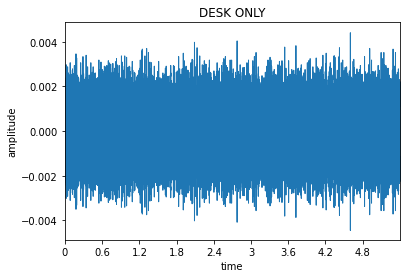

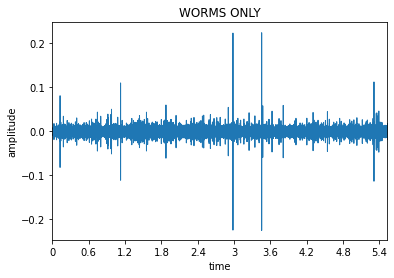

In [4]:
plt.figure()
librosa.display.waveplot(y=desk_samples, sr=desk_sr)
plt.title('DESK ONLY')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()
plt.figure()
librosa.display.waveplot(y=worms_samples, sr=worms_sr)
plt.title('WORMS ONLY')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

## 2. FFT

44100


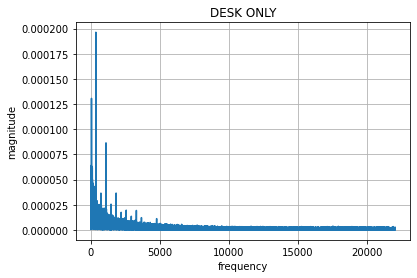

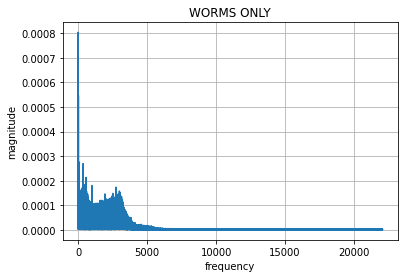

In [5]:
print(worms_sr)
nou.plot_fft(desk_samples, desk_sr, "DESK ONLY")
nou.plot_fft(worms_samples, worms_sr, "WORMS ONLY")

## 3. Spectograms

/Users/Lukas/miniconda3/envs/bed/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


Text(0.5, 0, 'Time [sec]')

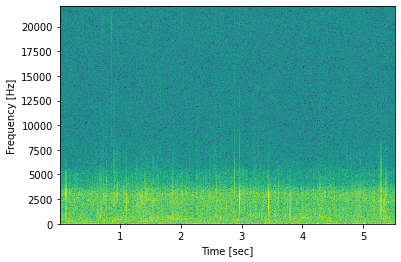

In [6]:
from scipy import signal
import numpy as np
frequencies, times, spectrogram = signal.spectrogram(worms_samples,worms_sr,nfft=1024,noverlap=900, nperseg=1024)
plt.pcolormesh(times, frequencies, 10*np.log10(spectrogram))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

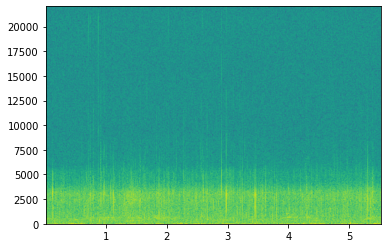

In [7]:
Pxx, freqs, bins, im = plt.specgram(worms_samples, NFFT=1024, Fs=worms_sr, noverlap=900)

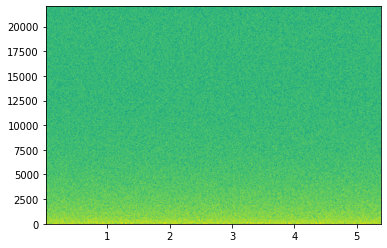

In [8]:
Pxx, freqs, bins, im = plt.specgram(desk_samples, NFFT=1024, Fs=desk_sr, noverlap=900)

/Users/Lukas/miniconda3/envs/bed/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/Lukas/miniconda3/envs/bed/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/Lukas/miniconda3/envs/bed/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


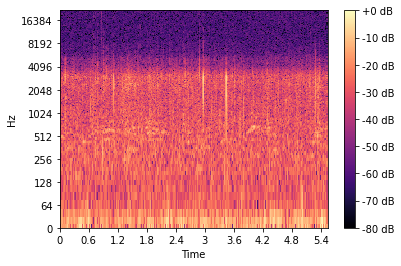

In [9]:
D = np.abs(librosa.stft(worms_samples, n_fft=2048,  hop_length=512))
DB = librosa.amplitude_to_db(D, ref=np.max)

librosa.display.specshow(DB, sr=worms_sr, hop_length=512, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

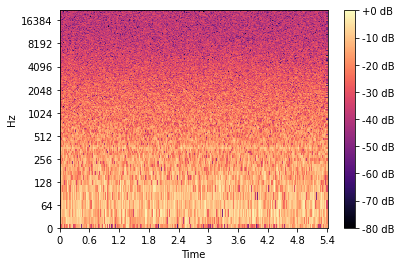

In [10]:
D = np.abs(librosa.stft(desk_samples, n_fft=2048,  hop_length=512))
DB = librosa.amplitude_to_db(D, ref=np.max)

librosa.display.specshow(DB, sr=desk_sr, hop_length=512, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

### 3.1 Mel Scale Transformation

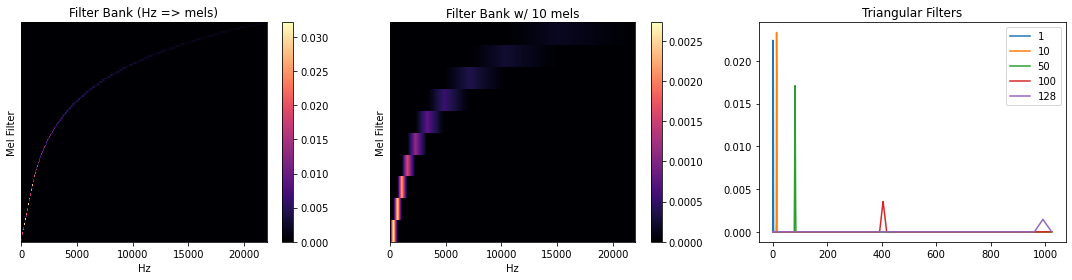

In [11]:
# just 4 understanding mel filters and their non-linear behaviour
nou.plot_mel_filters(worms_sr)

/Users/Lukas/miniconda3/envs/bed/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/Lukas/miniconda3/envs/bed/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


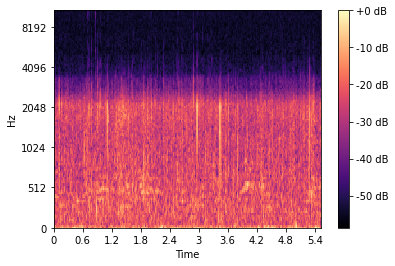

In [12]:
nou.plot_mel(worms_samples, worms_sr)

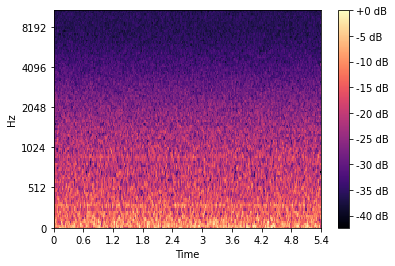

In [13]:
nou.plot_mel(desk_samples, desk_sr)